In [7]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_1D_2c.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

y = y.astype('uint8')
X = preprocessing.scale(X)

# add 1
X = np.hstack((np.ones((len(X), 1)), X))

# get parameters
data_size, D = X.shape
K = 2
m = 1

def softmax(z):
    z -= np.max(z)
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def predict(X, theta):
    return softmax(np.dot(X, theta))

def compute_loss(preds, y):
    return np.sum(- np.log(preds[np.arange(m), y]))/m

def convert_one_hot(y, K):  
    one_hot = np.zeros((len(y), K))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

def compute_gradient(preds, X, y):
    gradient = 1/m * np.dot(X.T, preds - convert_one_hot(y, K))
    return gradient

# init theta
np.random.seed(0)
theta = np.random.randn(D, K)

hist = {'loss': [], 'acc': []}
lr = 0.1

num_epoch = 10
for _ in range(num_epoch):
    for i in range(data_size):
        xi = X[i:i+1]
        yi = y[i:i+1]
                
        # compute output
        preds = predict(xi, theta)
        
        # compute loss
        loss = compute_loss(preds, yi)

        # for debug
        hist['loss'].append(loss) 

        # compute gradient
        gradient = compute_gradient(preds, xi, yi)

        # update
        theta = theta - lr*gradient

        # for debug
        predicted_class = np.argmax(predict(X, theta), axis=1)
        hist['acc'].append(np.mean(predicted_class == y))

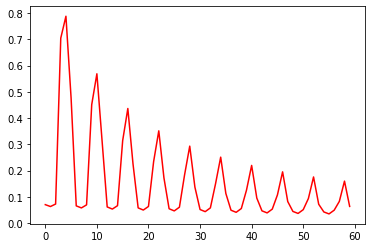

In [8]:
x_axis = range(len(hist['loss']))
plt.plot(x_axis, hist['loss'], color="r")
plt.show()

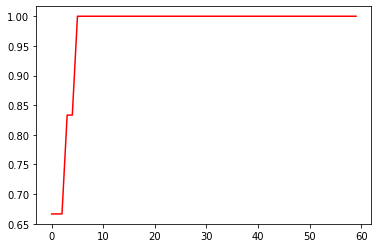

In [9]:
x_axis = range(len(hist['acc']))
plt.plot(x_axis, hist['acc'], color="r")
plt.show()

In [17]:
print(predicted_class)

[2]
